In [1]:
import pandas as pd

from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
from nltk import ngrams

In [3]:
df = pd.read_csv('preprocessed_data.csv')

In [4]:
df['transcript']

0      ['botella', 'agua', 'litro', 'mano', 'material...
1      ['bajar', 'silla', 'quedar', 'tocar', 'vídeo',...
2      ['música', 'preparar', 'educar él', 'fondo', '...
3      ['apreciar', 'makeup', 'ver', 'horrenda', 'hor...
4      ['música', 'músico', 'quedar', 'increíble', 'e...
                             ...                        
283    ['jugo', 'par', 'semana', 'decir', 'twitter', ...
284    ['jugado', 'verde', 'pregunta', 'respuesta', '...
285    ['bello', 'aeropuerto', 'mochilo', 'montado', ...
286    ['nervio', 'real', 'real', 'eurovisión', 'ador...
287    ['holar', 'confesaro', 'esque', 'llevar', 'año...
Name: transcript, Length: 288, dtype: object

In [5]:
occurrences_per_transcript = df['transcript'].str.count(r'xxxx')

# Calculate total occurrences
total_insults = occurrences_per_transcript.sum()

# Calculate average occurrence per transcript
average_occurrence = total_insults / len(df)

print(f"Average occurrences of 'xxxx' per transcript: {average_occurrence:.2f}")
print(f"Total occurrences of 'xxxx' per transcript: {total_insults:.2f}")

Average occurrences of 'xxxx' per transcript: 8.07
Total occurrences of 'xxxx' per transcript: 2324.00


In [6]:
import ast

processed_transcripts = df['transcript'].apply(ast.literal_eval)


In [7]:
type(processed_transcripts)

pandas.core.series.Series

In [8]:
# 1. Identify commonly used phrases using N-grams
all_ngrams = [ngram for transcript in processed_transcripts for ngram in ngrams(transcript, 3)]  # trigrams
common_phrases = Counter(all_ngrams).most_common(20)
print("Common Phrases:")
for phrase, freq in common_phrases:
    print(f"{' '.join(phrase)}: {freq}")

Common Phrases:
dejar botón maravilloso: 201
vídeo esperar gustar: 186
botón maravilloso suscribar: 179
maravilloso suscribar canal: 176
suscribar canal vídeo: 161
vídeo ver vídeo: 156
canal vídeo ver: 129
ver vídeo música: 123
chico vídeo esperar: 107
esperar gustar dar él: 80
gustar dar él gustar: 80
música aplauso música: 76
dar él gustar gustar: 76
poder dejar botón: 66
gusto poder dejar: 63
gente vídeo esperar: 58
gustar gusto poder: 50
aplauso música aplauso: 49
ay ay ay: 36
dalar gustar gustar: 35


In [9]:
# 2. Identify topics using LDA
dictionary = Dictionary(processed_transcripts)
corpus = [dictionary.doc2bow(transcript) for transcript in processed_transcripts]
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, passes=15, workers=4)
print("\nTopics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}, Words: {topic}")


Topics:
Topic: 0, Words: 0.008*"decir" + 0.007*"xxxx" + 0.006*"ver" + 0.005*"querer" + 0.005*"venir" + 0.005*"libro" + 0.004*"persona" + 0.004*"estar" + 0.004*"pasar" + 0.004*"gente"
Topic: 1, Words: 0.014*"i" + 0.013*"and" + 0.012*"you" + 0.010*"the" + 0.009*"to" + 0.006*"it" + 0.005*"that" + 0.005*"my" + 0.005*"like" + 0.005*"all"
Topic: 2, Words: 0.015*"música" + 0.013*"xxxx" + 0.012*"canción" + 0.011*"decir" + 0.010*"gustar" + 0.009*"ver" + 0.008*"vídeo" + 0.006*"actuación" + 0.006*"pasar" + 0.005*"eurovisión"
Topic: 3, Words: 0.016*"música" + 0.011*"xxxx" + 0.010*"vídeo" + 0.009*"ver" + 0.009*"decir" + 0.007*"gustar" + 0.006*"querer" + 0.006*"venir" + 0.005*"gente" + 0.005*"encantar"
Topic: 4, Words: 0.021*"música" + 0.015*"canción" + 0.011*"xxxx" + 0.010*"gustar" + 0.008*"decir" + 0.008*"ver" + 0.006*"vídeo" + 0.005*"querer" + 0.005*"encantar" + 0.005*"aplauso"


In [10]:
# 3. Identify unique terms/values using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(transcript) for transcript in processed_transcripts])
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_items = sorted(list(enumerate(tfidf_matrix.sum(axis=0).tolist()[0])), key=lambda x: x[1], reverse=True)
print("\nUnique Terms:")
for idx, score in sorted_items[:10]:
    print(f"{feature_names[idx]}: {score}")



Unique Terms:
canción: 23.147119943936353
xxxx: 22.279390618344234
actuación: 11.312854025647377
eurovisión: 10.474716292455563
encantar: 9.64823517329264
cantar: 9.10539504310818
año: 8.89702820928666
aplauso: 8.805097617319893
gente: 8.464589518882391
favor: 8.326469222881107


In [11]:
all_tokens = [token for transcript in processed_transcripts for token in transcript]

# Count the occurrences of each token
word_freq = Counter(all_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('música', 3373), ('xxxx', 2324), ('decir', 1948), ('canción', 1914), ('gustar', 1816), ('ver', 1768), ('vídeo', 1617), ('querer', 1171), ('venir', 1076), ('pasar', 975), ('encantar', 923), ('gente', 886), ('dejar', 886), ('año', 865), ('favor', 833)]
        Word  Frequency
0     música       3373
1       xxxx       2324
2      decir       1948
3    canción       1914
4     gustar       1816
5        ver       1768
6      vídeo       1617
7     querer       1171
8      venir       1076
9      pasar        975
10  encantar        923
11     gente        886
12     dejar        886
13       año        865
14     favor        833


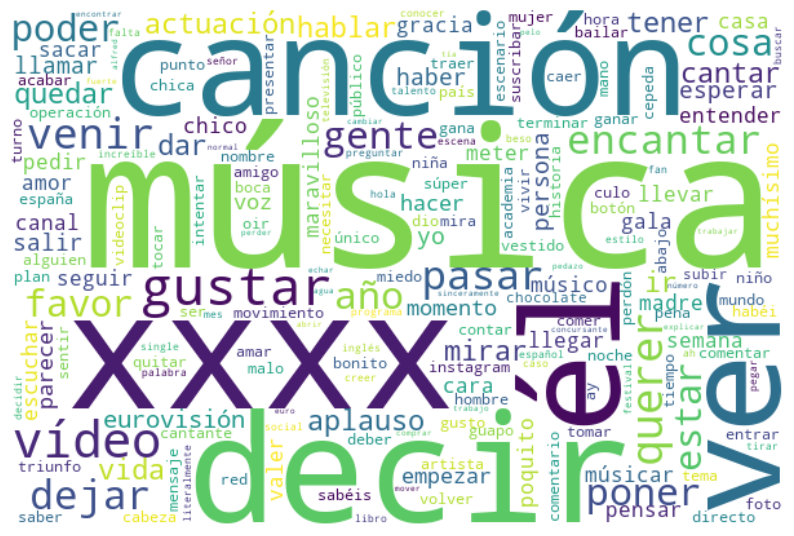

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the list of tokens back into a single string for each transcript
all_text = ' '.join([' '.join(transcript) for transcript in processed_transcripts])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(all_text)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("transcript_wordcloud.png")

plt.show()